In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Neural Networks for Regression

In [2]:
class layer:
    'Neural network dense layer'
    
    # initialization (weights and biases)
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1*np.random.randn(n_inputs, n_neurons) 
        self.biases = np.zeros((1,n_neurons))

    # output
    def forward(self, inputs):
        self.output = inputs.dot(self.weights) + self.biases
        
        # remember input values
        self.inputs = inputs
      
    def backward(self, dvalues):
        
        # gradient
        self.dinputs = dvalues.dot(self.weights.T)
        
        # gradients on parameters
        self.dweights = self.inputs.T.dot(dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        
class activation_ReLU:
    'rectified linear unit activation function'
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
        # remember input values
        self.inputs = inputs
        
    def backward(self, dvalues):

        # copy dvalues
        self.dinputs = dvalues.copy()
        
        # zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0
        
class activation_linear:
    'linear activation function: output = inputs'

    def forward(self, inputs):
        # flatten the output
        self.inputs = inputs
        self.output = inputs.flatten()

    def backward(self, dvalues):
        # derivative of x is 1 
        self.dinputs = dvalues.copy().reshape(-1,1) # reshape the result as a column vector
        
class activation_softmax:
    'softmax activation function'
    
    def forward(self, inputs):
        
        # unnormalized probabilities
        exp_values = np.exp(inputs-np.max(inputs,axis=1, keepdims=True))
        
        # normalized probabilities
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        
        # remember input values
        self.inputs = inputs
        
    def backward(self,dvalues):

        
        # initialized gradient (derivative) array
        self.dinputs = np.zeros(dvalues.shape)
        
        # For each data point, compute gradient
        for i in range(len(dvalues)):
            output_row = self.output[i]
            dvalues_row = dvalues[i]
            
            # Flatten output array
            output_row = output_row.reshape(-1, 1)

            # Calculate derivative matrix of the output
            derivative_matrix = np.diagflat(output_row) - output_row.dot(output_row.T)
            
            # store gradient
            self.dinputs[i] = dvalues_row.dot(derivative_matrix)


class loss:
    def calculate(self, output,y):
        sample_losses = self.forward(output,y)
        loss = np.mean(sample_losses)
        return loss
    
     
class loss_crossentropy(loss):
    'cross-entropy loss function'    
    
    def forward(self, y_pred, y_true):
        
        # number of data points
        n_samples = len(y_pred)
        
        # clip data to prevent division by 0
        y_pred_clipped = np.clip(y_pred, 1e-7,1 - 1e-7)
        
        # confidence values
        confidence_values = y_pred_clipped[range(n_samples),y_true]
       
        # sample losses 
        losses = -np.log(confidence_values)
        return losses
    
    
    def backward(self, dvalues, y_true):
        
        
        # Number of samples
        n_samples = len(dvalues)
    
        #one-hot matrix
        Y = np.zeros(dvalues.shape)
        Y[np.arange(len(y_true)),y_true] = 1
        
        # Calculate gradient
        self.dinputs = -Y / dvalues
        
        # Normalize gradient
        self.dinputs = self.dinputs / n_samples
        
class loss_meansquarederror(loss):
    'Mean Squared Error loss'

    def forward(self, y_pred, y_true):
        
    # calculate loss
        sample_losses = (y_true - y_pred)**2
        # return losses
        return sample_losses

    def backward(self, dvalues, y_true):
        
        # number of data points
        samples = len(dvalues)

        # gradient 
        self.dinputs = -2 * (y_true - dvalues) 
        
        # normalize gradient
        self.dinputs = self.dinputs / samples

# GD optimizer
class optimizer_GD:

    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate
        
    def update_parameters(self, layer):
        layer.weights = layer.weights - self.learning_rate*layer.dweights
        layer.biases = layer.biases - self.learning_rate*layer.dbiases

## Example

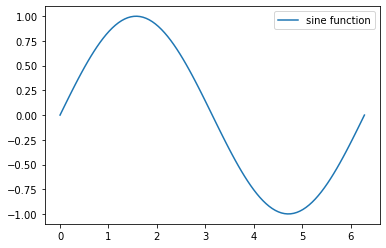

In [3]:
# sine function
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y, label='sine function')
plt.legend()

In [4]:
# reshape x as a column vector 
X = x.reshape(-1,1)

**two-layers neural network, no ReLU activation function**

In [5]:
# neural network (without ReLU activation function)
layer1 = layer(n_inputs = 1, n_neurons = 64)
layer2 = layer(n_inputs = 64, n_neurons = 1)
activation2 = activation_linear()
loss_function = loss_meansquarederror()

In [6]:
optimizer = optimizer_GD(learning_rate = .1)

In [7]:
# gradient descent
n_epochs = 2000
loss = np.zeros(n_epochs)
for i in range(n_epochs):
    
    # forward pass
    layer1.forward(X)
    layer2.forward(layer1.output)
    activation2.forward(layer2.output)
    
    # loss
    losses = loss_function.forward(activation2.output,y)
    loss[i] = np.mean(losses)
    
    
    # backward pass
    loss_function.backward(activation2.output,y)
    activation2.backward(loss_function.dinputs)
    layer2.backward(activation2.dinputs)
    layer1.backward(layer2.dinputs)
    
    # update weights and biases
    optimizer.update_parameters(layer1)
    optimizer.update_parameters(layer2)
    
    
    # print loss and accuracy every 100 epochs
    if i % 100 == 0:
        print('epoch: '+str(i))
        print('loss: '+str(np.round(loss[i],3)))
        print('------------------------')

epoch: 0
loss: 0.711
------------------------
epoch: 100
loss: 0.203
------------------------
epoch: 200
loss: 0.203
------------------------
epoch: 300
loss: 0.203
------------------------
epoch: 400
loss: 0.203
------------------------
epoch: 500
loss: 0.203
------------------------
epoch: 600
loss: 0.203
------------------------
epoch: 700
loss: 0.203
------------------------
epoch: 800
loss: 0.203
------------------------
epoch: 900
loss: 0.203
------------------------
epoch: 1000
loss: 0.203
------------------------
epoch: 1100
loss: 0.203
------------------------
epoch: 1200
loss: 0.203
------------------------
epoch: 1300
loss: 0.203
------------------------
epoch: 1400
loss: 0.203
------------------------
epoch: 1500
loss: 0.203
------------------------
epoch: 1600
loss: 0.203
------------------------
epoch: 1700
loss: 0.203
------------------------
epoch: 1800
loss: 0.203
------------------------
epoch: 1900
loss: 0.203
------------------------


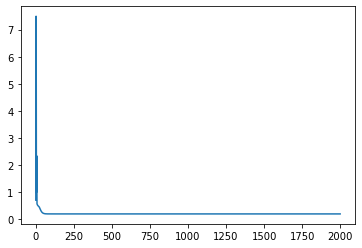

In [8]:
plt.plot(loss)

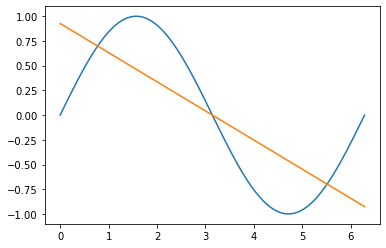

In [9]:
plt.plot(x,y)
plt.plot(x,activation2.output)

**two-layers neural network**

In [6]:
# neural network
layer1 = layer(n_inputs = 1, n_neurons = 64)
activation1 = activation_ReLU()
layer2 = layer(n_inputs = 64, n_neurons = 1)
activation2 = activation_linear()
loss_function = loss_meansquarederror()

In [11]:
# forward pass
layer1.forward(X)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)
# loss
losses = loss_function.forward(activation2.output,y)

In [12]:
losses.shape

(100,)

In [13]:
loss_function.backward(activation2.output,y)

In [17]:
loss_function.dinputs.shape

(100,)

In [11]:
optimizer = optimizer_GD(learning_rate = .1)

In [12]:
# gradient descent
n_epochs = 2000
loss = np.zeros(n_epochs)
for i in range(n_epochs):
    
    # forward pass
    layer1.forward(X)
    activation1.forward(layer1.output)
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    
    # loss
    losses = loss_function.forward(activation2.output,y)
    loss[i] = np.mean(losses)
    
    
    # backward pass
    loss_function.backward(activation2.output,y)
    activation2.backward(loss_function.dinputs)
    layer2.backward(activation2.dinputs)
    activation1.backward(layer2.dinputs)
    layer1.backward(activation1.dinputs)
    
    # update weights and biases
    optimizer.update_parameters(layer1)
    optimizer.update_parameters(layer2)
    
    
    # print loss and accuracy every 100 epochs
    if i % 100 == 0:
        print('epoch: '+str(i))
        print('loss: '+str(np.round(loss[i],3)))
        print('------------------------')

epoch: 0
loss: 0.642
------------------------
epoch: 100
loss: 0.175
------------------------
epoch: 200
loss: 0.172
------------------------
epoch: 300
loss: 0.17
------------------------
epoch: 400
loss: 0.171
------------------------
epoch: 500
loss: 0.169
------------------------
epoch: 600
loss: 0.167
------------------------
epoch: 700
loss: 0.166
------------------------
epoch: 800
loss: 0.164
------------------------
epoch: 900
loss: 0.163
------------------------
epoch: 1000
loss: 0.163
------------------------
epoch: 1100
loss: 0.163
------------------------
epoch: 1200
loss: 0.163
------------------------
epoch: 1300
loss: 0.163
------------------------
epoch: 1400
loss: 0.163
------------------------
epoch: 1500
loss: 0.163
------------------------
epoch: 1600
loss: 0.163
------------------------
epoch: 1700
loss: 0.163
------------------------
epoch: 1800
loss: 0.163
------------------------
epoch: 1900
loss: 0.163
------------------------


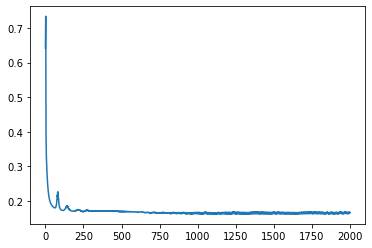

In [13]:
plt.plot(loss)

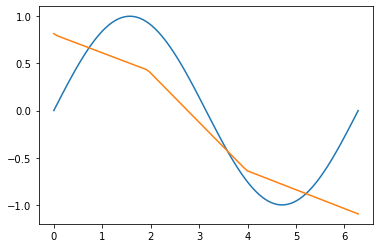

In [14]:
# our neural network is stuck in a local minimum of the loss function?
plt.plot(x,y)
plt.plot(x,activation2.output)

**three-layers neural network**

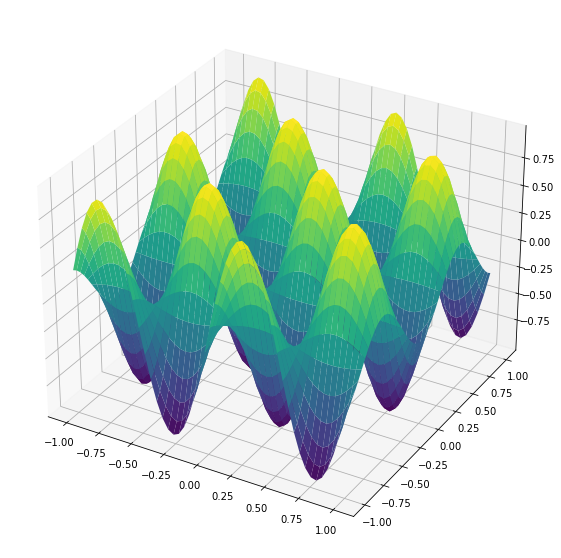

In [3]:
m = 50
x1 = np.linspace(-1,1,m)
x2 = np.linspace(-1,1,m)
X1,X2 = np.meshgrid(x1,x2)
Y = np.sin(6*X1)*np.cos(6*X2)  # f(x,y) = sin(6x)cos(6x)

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [4]:
# reshape data
X = np.c_[X1.reshape(-1,1),X2.reshape(-1,1)]
y = Y.reshape(-1)
X.shape, y.shape

((2500, 2), (2500,))

In [5]:
# neural network
layer1 = layer(n_inputs = 2, n_neurons = 64)
activation1 = activation_ReLU()
layer2 = layer(n_inputs = 64, n_neurons = 64)
activation2 = activation_ReLU()
layer3 = layer(n_inputs = 64, n_neurons = 1)
activation3 = activation_linear()
loss_function = loss_meansquarederror()

In [6]:
optimizer = optimizer_GD(0.5)

In [10]:
# gradient descent
n_epochs = 2000
loss = np.zeros(n_epochs)
for i in range(n_epochs):
    
    # forward pass
    layer1.forward(X)
    activation1.forward(layer1.output)
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    layer3.forward(activation2.output)
    activation3.forward(layer3.output)
    
    # loss
    losses = loss_function.forward(activation3.output,y)
    loss[i] = np.mean(losses)
    
    
    # backward pass
    loss_function.backward(activation3.output,y)
    activation3.backward(loss_function.dinputs)
    layer3.backward(activation3.dinputs)
    activation2.backward(layer3.dinputs)
    layer2.backward(activation2.dinputs)
    activation1.backward(layer2.dinputs)
    layer1.backward(activation1.dinputs)
    
    # update weights and biases
    optimizer.update_parameters(layer1)
    optimizer.update_parameters(layer2)
    optimizer.update_parameters(layer3)
    
    
    # print loss and accuracy every 100 epochs
    if i % 100 == 0:
        print('epoch: '+str(i))
        print('loss: '+str(np.round(loss[i],3)))
        print('------------------------')

epoch: 0
loss: 0.134
------------------------
epoch: 100
loss: 0.128
------------------------
epoch: 200
loss: 0.119
------------------------
epoch: 300
loss: 0.105
------------------------
epoch: 400
loss: 0.098
------------------------
epoch: 500
loss: 0.09
------------------------
epoch: 600
loss: 0.084
------------------------
epoch: 700
loss: 0.079
------------------------
epoch: 800
loss: 0.075
------------------------
epoch: 900
loss: 0.071
------------------------
epoch: 1000
loss: 0.067
------------------------
epoch: 1100
loss: 0.064
------------------------
epoch: 1200
loss: 0.062
------------------------
epoch: 1300
loss: 0.059
------------------------
epoch: 1400
loss: 0.057
------------------------
epoch: 1500
loss: 0.054
------------------------
epoch: 1600
loss: 0.053
------------------------
epoch: 1700
loss: 0.05
------------------------
epoch: 1800
loss: 0.047
------------------------
epoch: 1900
loss: 0.047
------------------------


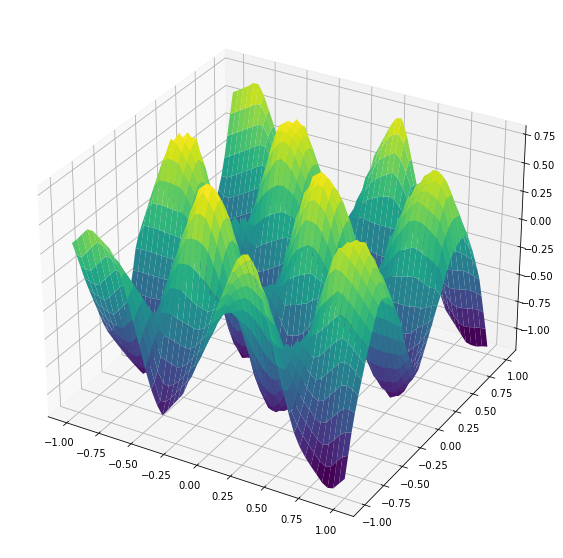

In [11]:
Y_pred = activation3.output.reshape(m,m)
# plot prediction
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
Y_pred = activation3.output.reshape(m,m)
ax.plot_surface(X1, X2, Y_pred, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')